In [65]:
import random
import gensim
import nltk
import codecs
import pymorphy2
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as pp

morph = pymorphy2.MorphAnalyzer()

In [66]:
filename = "ruscorpora_upos_skipgram_300_5_2018.vec"
path = "/home/katty/Загрузки/" + filename
model = gensim.models.KeyedVectors.load_word2vec_format(path)

In [67]:
text = codecs.open("/home/katty/anaconda3/_nlp/project_hp/corp/6.txt", "r", "utf-8").read()

In [111]:
normal_text = []
for word in nltk.tokenize.word_tokenize(text):
    if word.isalpha():
        morph_res = morph.parse(word.lower())[0]
        normal_text.append(morph_res.normal_form + "_" + str(morph_res.tag).split(",")[0])

normal_text = list(set(normal_text))
print(normal_text[:10])

['сдержать_PRTF', 'пышный_ADJF', 'скобка_NOUN', 'беспричинный_ADJF femn', 'прогудеть_VERB', 'заволочь_VERB', 'ступать_GRND', 'проигрывать_VERB', 'прятаться_VERB', 'путешествие_NOUN']


In [112]:
counter_non_words = 0
mx = []
using_words = []
for word in normal_text:
    try:
        vector = model.get_vector(word)
        mx.append(vector)
        using_words.append(word)
    except KeyError:
        counter_non_words += 1

print(len(normal_text), len(using_words), counter_non_words)

14273 6697 7576


In [129]:
vis_scaler = StandardScaler()
#vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(mx)
print("Scales done!")
t_2 = t_scales


Scales done!


In [130]:
num_cls = 30

kmeans = KMeans(num_cls)

cluster = kmeans.fit_predict(t_2)

[[-0.15781895 -0.4814362   0.25790003 ...  0.49992465 -0.3955626
   0.11575424]
 [ 0.39107864  0.16120434  0.21973516 ...  0.49346288  1.08812676
  -0.10393939]
 [ 0.20091438 -0.0627757   0.61092897 ...  0.57384375 -0.40738139
  -0.08526185]
 ...
 [ 0.35274198  0.10027084 -0.3297111  ...  0.04607758 -0.62875423
  -0.19996244]
 [-0.35656228  0.43328876 -0.04593844 ... -0.28624567  0.2816947
  -0.68275683]
 [-0.03727457  0.00290506  0.38170227 ...  0.19701194  0.08276056
  -0.08860369]]


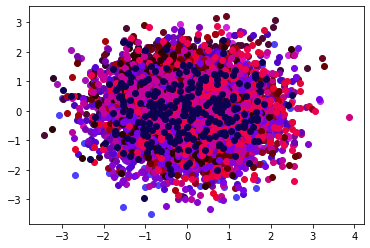

In [131]:

cluster_system = []
for i in range(num_cls):
    cluster_system.append(t_2[cluster==i, :])
#t_first = t_2[cluster == 0, :]
#t_second = t_2[cluster == 1, :]
#t_third = t_2[cluster == 2, :]
#t_fourth = t_2[cluster == 3, :]

# хотела вытащить центроидные слова, но пока сложно
centers = kmeans.cluster_centers_
print(centers)

for i in range(num_cls):
    color_r = random.randint(0, 1000)
    color_b = random.randint(0, 1000)
    pp.plot(cluster_system[i][:, 0], cluster_system[i][:, 1],  'o', color=(color_r/1000, 255/((i+1)*1000), color_b/1000, 1))
#pp.plot(t_second[:, 0], t_second[:, 1], 'oy')
#pp.plot(t_third[:, 0], t_third[:, 1], 'og')
#pp.plot(t_fourth[:, 0], t_fourth[:, 1], 'or')
#pp.plot(centers[:, 0], centers[:, 1], 'x')
#pp.xlim([-3, 3])
#pp.ylim([-3, 3])

In [132]:
cls = []

for i in range(num_cls):
    cls.append([])

for i in range(len(using_words)):
    for j in range(num_cls):
        if cluster[i] == j:
            cls[j].append(using_words[i])

print("Размеры кластеров:")
for i in range(num_cls):
    print(len(cls[i]))

for cls_ in cls:
    random.shuffle(cls_)
    print(cls_[:20])

Размеры кластеров:
278
240
208
326
172
206
128
302
262
169
221
156
198
198
216
292
283
189
224
255
197
221
156
121
224
235
310
283
171
256
['обрушить_VERB', 'подкрепление_NOUN', 'наступление_NOUN', 'сосредоточить_VERB', 'удар_NOUN', 'перенести_VERB', 'врасти_VERB', 'разделить_VERB', 'дожить_VERB', 'сдаваться_VERB', 'продержаться_VERB', 'отделаться_VERB', 'погибать_VERB', 'вырвать_VERB', 'сразиться_VERB', 'подчиняться_VERB', 'перебросить_VERB', 'гибнуть_VERB', 'наступать_VERB', 'проникнуть_VERB']
['стрелка_NOUN', 'край_NOUN', 'плита_NOUN', 'снег_NOUN', 'спуск_NOUN', 'проход_NOUN', 'дорожка_NOUN', 'миля_NOUN', 'долина_NOUN', 'глубина_NOUN', 'пруд_NOUN', 'полукружие_NOUN', 'улочка_NOUN', 'маяк_NOUN', 'верхушка_NOUN', 'деревня_NOUN', 'возвышение_NOUN', 'опушка_NOUN', 'корабль_NOUN', 'песок_NOUN']
['указатель_NOUN', 'толстой_NOUN', 'галатея_NOUN', 'давность_NOUN', 'пояснение_NOUN', 'стиль_NOUN', 'записывать_VERB', 'перечеркнуть_VERB', 'обозрение_NOUN', 'прочесть_VERB', 'браун_NOUN', 'инициа